# Алгоритм

Алгоритм — это пошаговое руководство, которое описывает последовательность действий для решения проблемы. Представь его как рецепт: он говорит тебе, что делать сначала, что потом, и так до самого конца. Продукты на кухне это входные данные, с котороми ты работаешь по алгоритму. Рецепты бывают разные, самые лучшие это те, в которых минимум шагов или которые не занимают много времени.

# Асимптотический анализ

Асимптотический анализ нужен для того, чтобы понять, как долго будет работать алгоритм, когда количество данных, которые нужно обработать, становится очень большим. 

**Прогнозирование производительности:**\
   Он помогает нам предсказать, насколько быстро будет работать программа, когда объем данных увеличится. Например, если у тебя есть программа для сортировки списка, асимптотический анализ подскажет, как будет изменяться время сортировки, когда список станет очень длинным.

**Сравнение алгоритмов:**\
    С его помощью можно сравнивать разные алгоритмы между собой. Представь, что у тебя есть два способа решить одну задачу, и ты хочешь выбрать лучший. Асимптотический анализ покажет, какой из них будет работать быстрее при больших объемах данных.

## Реальный пример: 

### Визуализация алгоритма сортировки Bubble Sort

C:\Users\func\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:1741: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


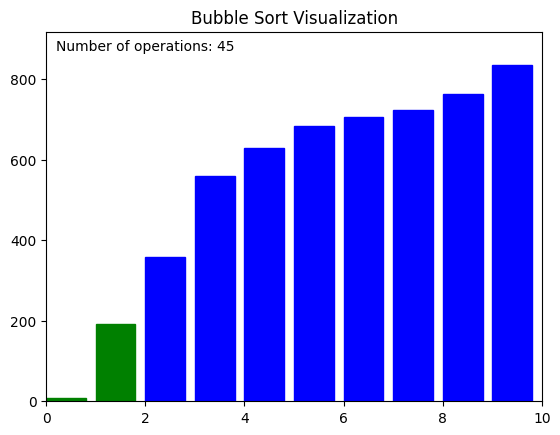

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Функция для создания генератора с копией исходного массива
def bubble_sort_visual(arr):
    array = np.copy(arr)
    n = len(array)
    for i in range(n):
        for j in range(0, n-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
            yield array, j, j+1

# Генерация случайного массива
np.random.seed(0)
original_arr = np.random.randint(0, 1000, 10)

# Создаем объект для анимации
fig, ax = plt.subplots()
ax.set_title("Bubble Sort Visualization")
bar_rects = ax.bar(range(len(original_arr)), original_arr, align="edge")
ax.set_xlim(0, len(original_arr))
ax.set_ylim(0, int(1.1 * max(original_arr)))
text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

iteration = [0]

def update_fig(data, rects, iteration):
    arr, left_index, right_index = data
    for rect, val in zip(rects, arr):
        rect.set_height(val)
        rect.set_color('b')
    rects[left_index].set_color('g')
    rects[right_index].set_color('g')
    iteration[0] += 1
    text.set_text(f"Number of operations: {iteration[0]}")

# Создаем генератор
gen = bubble_sort_visual(original_arr)

anim = animation.FuncAnimation(
    fig, 
    func=update_fig, 
    fargs=(bar_rects, iteration), 
    frames=gen, 
    repeat=False, 
    blit=False,
    interval=50,
    save_count=200
)

# Делаем анимацию интерактивной для Jupyter Notebook
from IPython.display import HTML
HTML(anim.to_jshtml())

### Анализ времени выполнения алгоритма Bubble Sort

Рассмотрим алгоритм сортировки пузырьком и измерим реальное время его выполнения для различных входных данных.

Измеряем время выполнения для наихудшего случая (массив отсортирован в обратном порядке), наилучшего случая (уже отсортированный массив) и случайного массива (усредненная оценка).

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Реализация алгоритма сортировки пузырьком с флагом "swapped"
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break  # Если не было обменов, массив уже отсортирован

# Функция для измерения времени выполнения сортировки пузырьком
def measure_time(size, generate_array_fn):
    arr = generate_array_fn(size)  # Генерация массива
    start_time = time.time()
    bubble_sort(arr)
    end_time = time.time()
    return end_time - start_time

# Данные для графика
sizes = np.arange(10, 1500, 100)  # Размеры входных данных с шагом 200
times = []

# Измерение времени выполнения для случайных массивов (средний случай)
for size in sizes:
    times.append(measure_time(size, lambda n: np.random.randint(0, 10000, n)))

# Оценки времени выполнения
worst_case_times = [measure_time(size, lambda n: np.arange(n, 0, -1)) for size in sizes]
best_case_times = [measure_time(size, lambda n: np.arange(0, n)) for size in sizes]
average_case_times = times  # Случайная выборка отражает средний случай

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(sizes, worst_case_times, 'r-', label='Худший случай O(n^2)')
plt.plot(sizes, average_case_times, 'g--', label='Усредненный случай O(n^2)')
plt.plot(sizes, best_case_times, 'b:', label='Лучший случай O(n)')

# Настройки графика
plt.title('Время выполнения алгоритма Bubble Sort')
plt.xlabel('Размер входных данных')
plt.ylabel('Время (секунды)')
plt.legend(loc='upper left')
plt.grid(True)

# Показать график
plt.show()